Initial cost: 66662.95555555556


C:\Users\GrischenkoEV\AppData\Local\Temp\ipykernel_2256\837340929.py:29: RuntimeWarning: overflow encountered in square
  reg_term = lambda_reg * np.sum(np.square(theta[1:]))  # регуляризация только для параметров
C:\Users\GrischenkoEV\AppData\Local\Temp\ipykernel_2256\837340929.py:42: RuntimeWarning: invalid value encountered in subtract
  theta[1:] -= (alpha / m) * (X[:, 1:].T.dot(error) + lambda_reg * theta[1:])  # регуляризация


Theta: [inf nan nan]


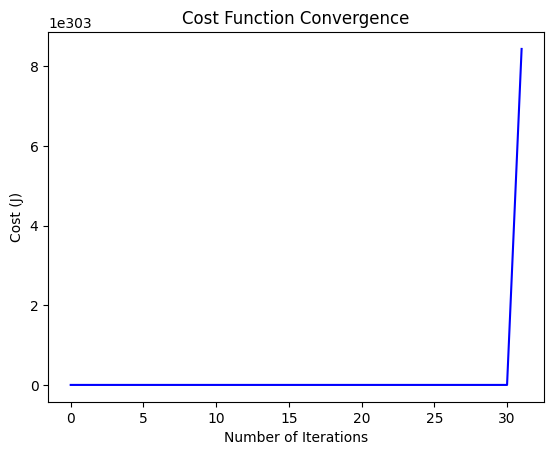

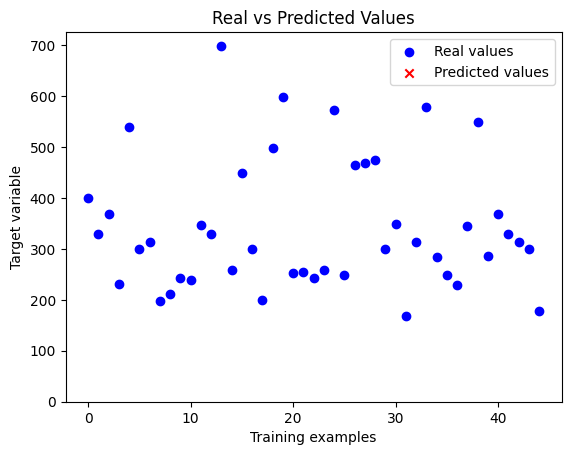

Prediction for new example: nan
Mean Absolute Error: nan


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def plotCostHistory(cost_history):
    """Построение графика функции потерь по итерациям."""
    plt.plot(cost_history, color='blue')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost (J)")
    plt.title("Cost Function Convergence")
    plt.show()

def plotPredictions(X, y, theta):
    """Построение графика для сравнения реальных и предсказанных значений, начиная от нуля по оси Y."""
    predictions = X.dot(theta)
    plt.scatter(range(len(y)), y, color='blue', label='Real values')
    plt.scatter(range(len(y)), predictions, color='red', label='Predicted values', marker='x')
    plt.xlabel("Training examples")
    plt.ylabel("Target variable")
    plt.title("Real vs Predicted Values")
    plt.ylim(bottom=0)  # Установка нижней границы Y в 0
    plt.legend()
    plt.show()

def computeCostMultiWithRegularization(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    reg_term = lambda_reg * np.sum(np.square(theta[1:]))  # регуляризация только для параметров
    return (1 / (2 * m)) * (np.sum(sq_errors) + reg_term)

def computePredictionError(y, predictions):
    """Вычисление средней абсолютной ошибки предсказаний."""
    return np.mean(np.abs(predictions - y))

def gradientDescentMultiWithRegularization(X, y, theta, alpha, num_iters, lambda_reg):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta[0] -= (alpha / m) * np.sum(error)  # не регуляризируем theta[0]
        theta[1:] -= (alpha / m) * (X[:, 1:].T.dot(error) + lambda_reg * theta[1:])  # регуляризация
        cost_history.append(computeCostMultiWithRegularization(X, y, theta, lambda_reg))
    return theta, cost_history

# Основной код
data = pd.read_csv('data_multivar.txt', header=None).iloc[:45]
student_data = pd.read_csv('Student_Performance.csv')

X = data.iloc[:, :-1]  # Все колонки, кроме последней, как признаки
y = data.iloc[:, -1]  # Последняя колонка как целевая переменная
m = len(y)

# Нормализация признаков
#X = (X - X.mean()) / X.std()

# Добавляем столбец единиц для учета свободного члена theta0
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros(X.shape[1])
lambda_reg = 1.2

# Вычисление начальной стоимости
initial_cost = computeCostMultiWithRegularization(X, y, theta, lambda_reg)
print(f"Initial cost: {initial_cost}")

# Настройка параметров для градиентного спуска
iterations = 2000  # Увеличиваем до 2000
alpha = 0.01  # Например, устанавливаем его равным 0.1

# Запуск градиентного спуска
theta, cost_history = gradientDescentMultiWithRegularization(X, y, theta, alpha, iterations, lambda_reg)
print(f"Theta: {theta}")

# Визуализация функции потерь
plotCostHistory(cost_history)

# Визуализация предсказаний и реальных значений
predictions = X.dot(theta)
plotPredictions(X, y, theta)

# Прогноз для новых данных (пример)
example = np.array([2104, 3])  # Пример новых данных (например, площадь и кол-во комнат)
example = (example - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()  # Нормализация примера
example = np.hstack([1, example])  # Добавляем 1 для учета theta0
prediction = example.dot(theta)
print(f"Prediction for new example: {prediction}")
# Вычисление и вывод ошибки предсказания
error = computePredictionError(y, predictions)
print(f"Mean Absolute Error: {error}")

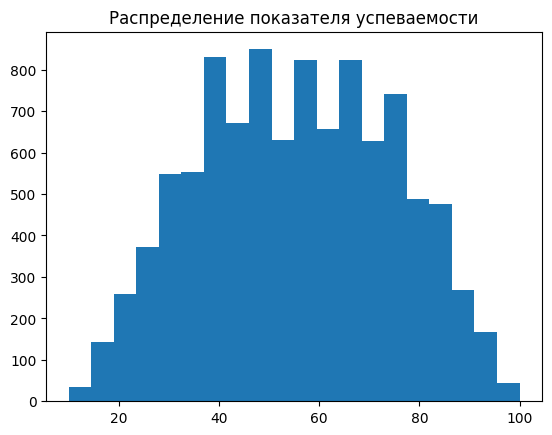

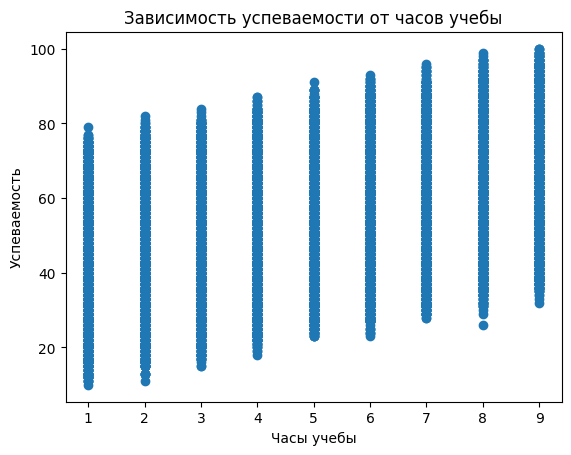

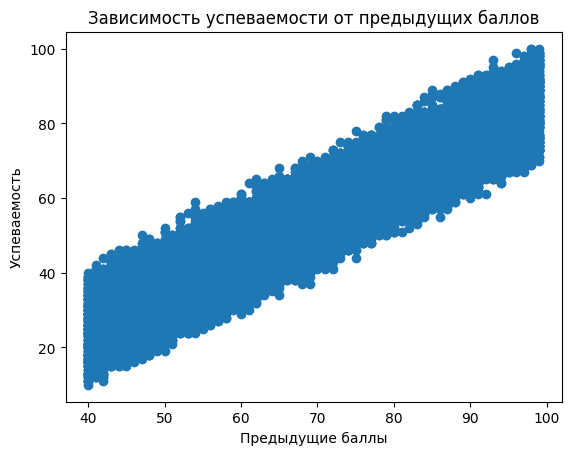

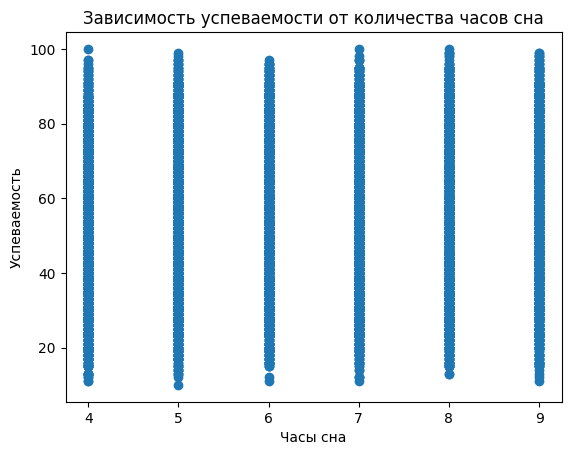

Mean Squared Error: 4.726380158439533
Mean Squared Error with Ridge: 4.7263699359382025


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Чтение файла
student_data = pd.read_csv('Student_Performance.csv')

# Построение графиков
plt.hist(student_data['Performance Index'], bins=20)
plt.title('Распределение показателя успеваемости')
plt.show()

plt.scatter(student_data['Hours Studied'], student_data['Performance Index'])
plt.title('Зависимость успеваемости от часов учебы')
plt.xlabel('Часы учебы')
plt.ylabel('Успеваемость')
plt.show()

plt.scatter(student_data['Previous Scores'], student_data['Performance Index'])
plt.title('Зависимость успеваемости от предыдущих баллов')
plt.xlabel('Предыдущие баллы')
plt.ylabel('Успеваемость')
plt.show()

plt.scatter(student_data['Sleep Hours'], student_data['Performance Index'])
plt.title('Зависимость успеваемости от количества часов сна')
plt.xlabel('Часы сна')
plt.ylabel('Успеваемость')
plt.show()

# Обучение модели
X = student_data[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
y = student_data['Performance Index']

# Разделение на обучение и тест
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
predictions = model.predict(X_valid)
mse = mean_squared_error(y_valid, predictions)
print(f'Mean Squared Error: {mse}')

# Регуляризация с помощью Ridge
ridge_reg = Ridge(alpha=1.0)  # Пример значения alpha
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_valid)

ridge_mse = mean_squared_error(y_valid, ridge_predictions)
print(f'Mean Squared Error with Ridge: {ridge_mse}')
